Group Members- Rashik Iram Chowdhury (2111336642), Zarin Akter (2011704042) and Md. Mutasim Farhan (2013123642)

# Loading the dataset and adjusting it to our criterion

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("G:\\Assignment\\Smarket.csv")
data = np.array(df)


**Here Year is not an useful feature for which we are dropping it and allocating 1 for Up and 0 for Down**

In [2]:
import math
final_dataset = data[:,:]

target = 8  # Assuming the target column index is the 8th column (0-indexed)

for row in range(len(final_dataset)):
    x = final_dataset[row][target]
    if x == "Up":
        final_dataset[row][target] = 1
    elif x == "Down":
        final_dataset[row][target] = 0
            
#There is no Missing Values in the dataset

df = pd.DataFrame(final_dataset)
#df.to_csv (r'G:\\Assignment\\Assignment2_Updated_Dataset.csv', index = None, header=True) 

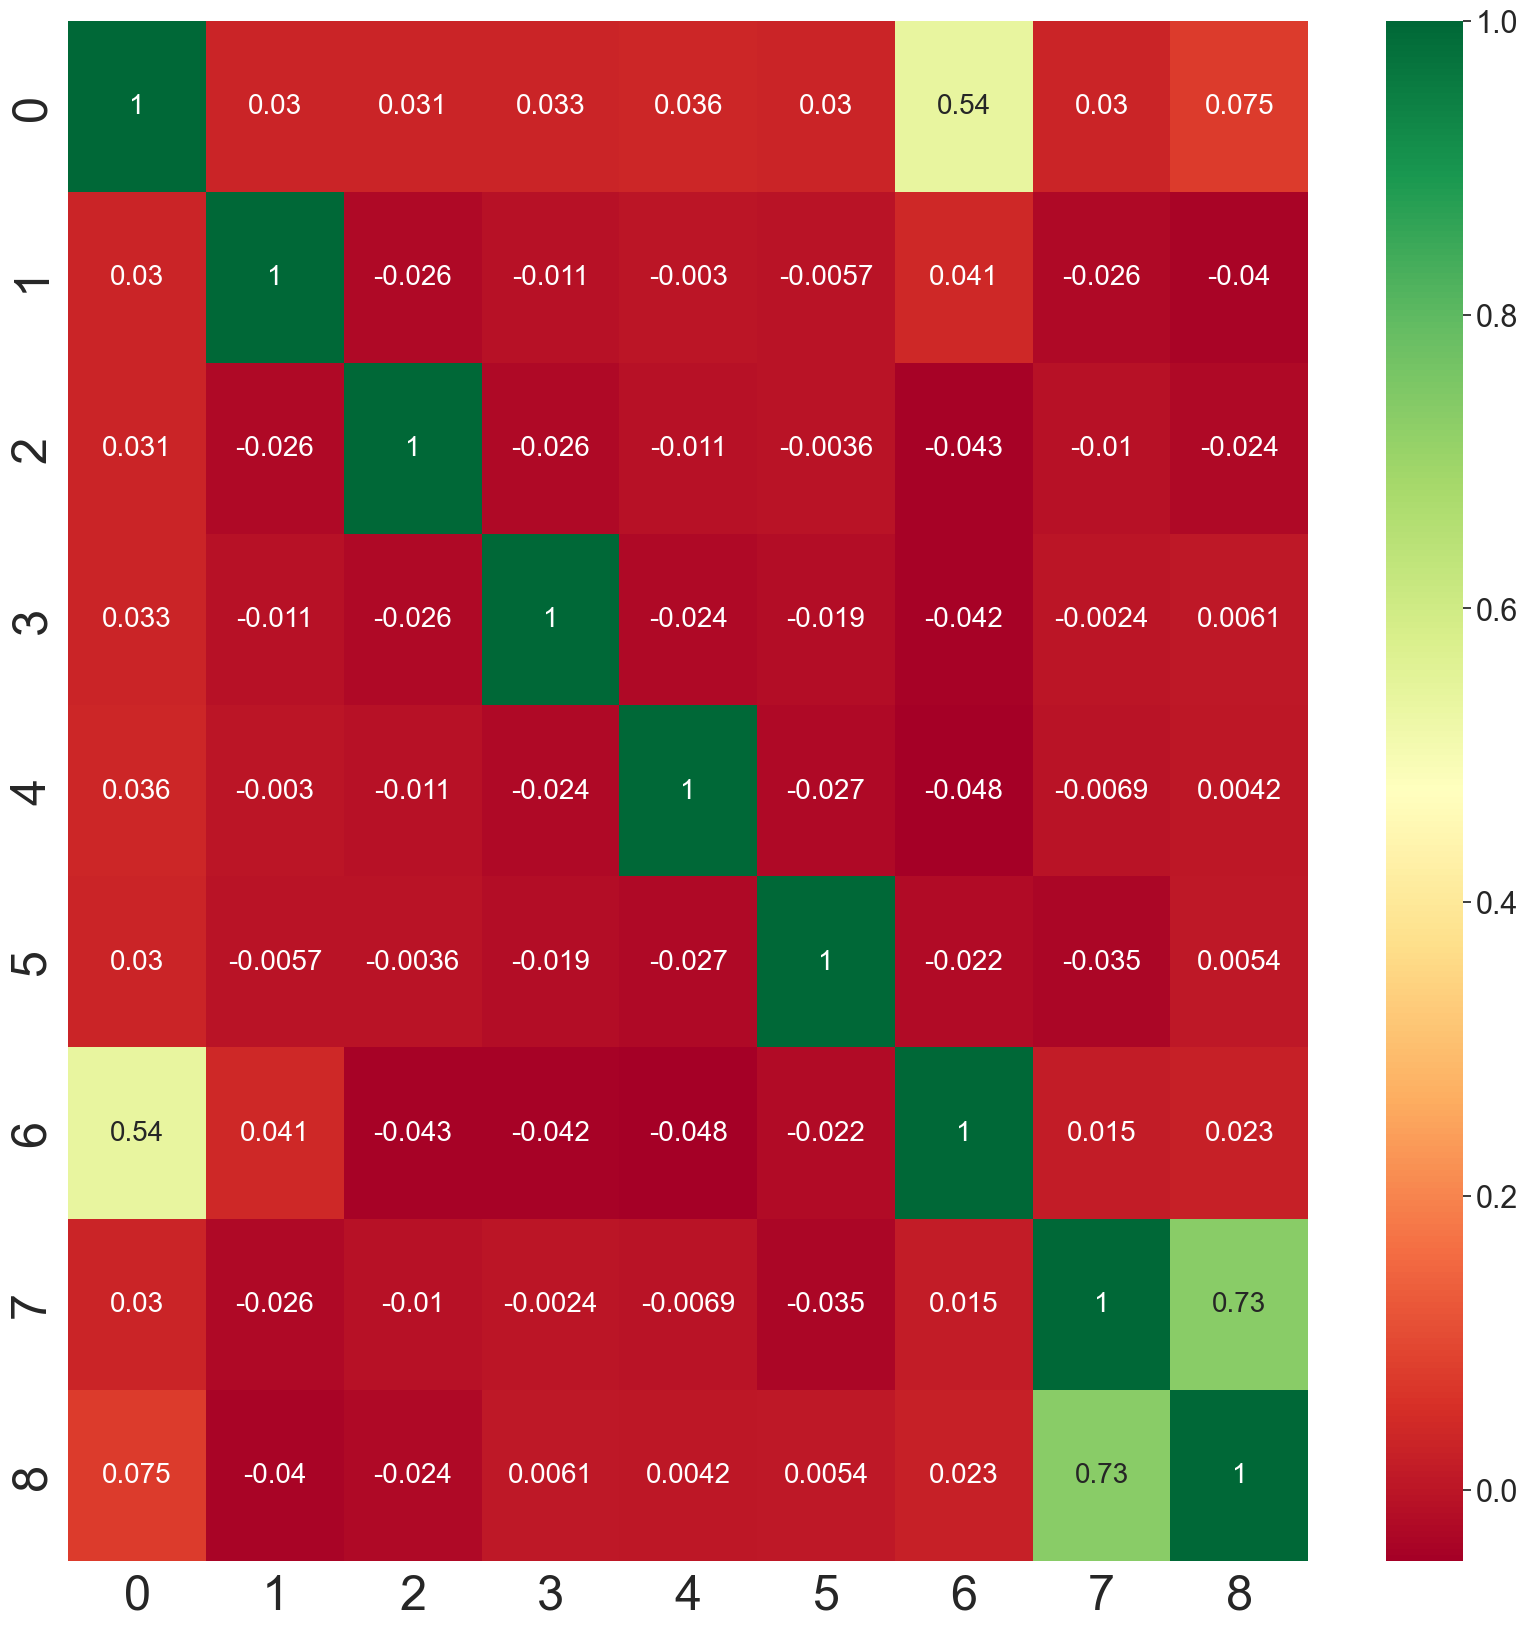

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap="RdYlGn", annot_kws={'size': 20})   #heatmap
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)

plt.show()

In [4]:
final_dataset[:,8]

array([1, 1, 0, ..., 1, 0, 0], dtype=object)

In [5]:
import math

final_dataset[:,8] #our target column for now
total_instances = len(final_dataset)
print("Total Instances: ", total_instances) #1250
#We could have tried shuffling for better experiment
Train_size = math.floor(0.75*total_instances)#937
print("Train dataset size: ", Train_size)

Train_ds = final_dataset[:Train_size]
Test_ds = final_dataset[Train_size:]

print("Shape of Train_ds:", Train_ds.shape)
print("Shape of Test_ds:", Test_ds.shape)


Total Instances:  1250
Train dataset size:  937
Shape of Train_ds: (937, 9)
Shape of Test_ds: (313, 9)


# Feature Engineering

In [6]:
print("Number of instances:", len(Train_ds))
print("Number of columns:", len(Train_ds[0]))

Number of instances: 937
Number of columns: 9


In [7]:
print("Number of instances without target:", len(Train_ds[:,0:8]))

Number of instances without target: 937


In [8]:
Train_ds[:,0:8]

array([[2001, 0.381, -0.192, ..., 5.01, 1.1913, 0.959],
       [2001, 0.959, 0.381, ..., -1.055, 1.2965, 1.032],
       [2001, 1.032, 0.959, ..., -2.624, 1.4112, -0.623],
       ...,
       [2004, -0.02, 0.427, ..., 0.158, 1.748, 1.518],
       [2004, 1.518, -0.02, ..., -0.594, 1.5822, 0.324],
       [2004, 0.324, 1.518, ..., 0.593, 1.534, -0.061]], dtype=object)

In [9]:
Train_ds[:,8]

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,

In [10]:
def feature_scaling(dataset):
    total_sum = [0] * len(dataset[0])
    instances = [0] * len(dataset[0])

    for columns in range(len(dataset[0])-1):
        for rows in range(len(dataset)):
            x = dataset[rows][columns]
            total_sum[columns] += x
            instances[columns] += 1

    means = [total_sum[i] / instances[i] if instances[i] != 0 else 0 for i in range(len(total_sum))]

    sum_squared_diff = [0] * len(dataset[0])

    for columns in range(len(dataset[0])-1):
        for rows in range(len(dataset)):
            x = dataset[rows][columns]
            diff = x - means[columns]
            sum_squared_diff[columns] += diff ** 2

    std_deviations = [((sum_squared_diff[i] / (instances[i] - 1)) ** 0.5) if instances[i] > 1 else 0 for i in range(len(sum_squared_diff))]

    for columns in range(len(dataset[0])-1):
        for rows in range(len(dataset)):
            value = dataset[rows][columns]
            normalized_value = (value - means[columns]) / std_deviations[columns] if std_deviations[columns] != 0 else 0
            dataset[rows][columns] = normalized_value
    
    return dataset, means, std_deviations


Considering target Direction

In [11]:
Train_ds[:, 0:8] 

array([[2001, 0.381, -0.192, ..., 5.01, 1.1913, 0.959],
       [2001, 0.959, 0.381, ..., -1.055, 1.2965, 1.032],
       [2001, 1.032, 0.959, ..., -2.624, 1.4112, -0.623],
       ...,
       [2004, -0.02, 0.427, ..., 0.158, 1.748, 1.518],
       [2004, 1.518, -0.02, ..., -0.594, 1.5822, 0.324],
       [2004, 0.324, 1.518, ..., 0.593, 1.534, -0.061]], dtype=object)

In [12]:
Train_ds, means, std_deviations = feature_scaling(Train_ds)
X_train = Train_ds[:, 0:8] 
y_train = Train_ds[:, 8]

#Performing Mean Normalization using means and std_deviations of Train_ds on Test_ds

for columns in range(len(Test_ds[0])-1):
        for rows in range(len(Test_ds)):
            value = Test_ds[rows][columns]
            normalized_value = (value - means[columns]) / std_deviations[columns] if std_deviations[columns] != 0 else 0
            Test_ds[rows][columns] = normalized_value


X_test = Test_ds[:, 0:8] 
y_test = Test_ds[:, 8]




In [13]:
y_train[:]

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,

In [14]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [15]:
final_dataset.shape[1]

9

# Calculating Mean Squared Error and applying Gradient Descent Algorithm 

In [16]:
import numpy as np

def cost_function_with_regularization(X, y, w, b, lamb_da):
    m = X.shape[0]  # Number of instances in the dataset
    n = X.shape[1]  # Number of features
    cost = 0
    regularizer = 0
    
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb = 1 / (1 + np.exp(-z))  # Hypothesis function
        cost += (y[i] * np.log(f_wb) + (1 - y[i]) * np.log(1 - f_wb))

    for j in range(n):
        regularizer += w[j] ** 2

    total_regularization = regularizer * lamb_da / (2 * m)
    total_cost = (-1 / m) * cost
    regularized_cost = total_cost + total_regularization

    return regularized_cost


Based on the heatmap earlier we are plugging in random weight values to check our regularized cost function.

In [17]:
w = np.array([0.075,-0.04,-0.024,0.0061,0.0042,0.0054,0.023,0.73])
b = 0 #Considering bias term 0
lamb_da = 0
print("Trial 1 Mean Squared Error: ", cost_function_with_regularization(X_train, y_train, w, b, lamb_da))
lamb_da = 1000
b = 0
print("Trial 2 Mean Squared Error: ", cost_function_with_regularization(X_train, y_train, w, b, lamb_da))
lamb_da = 10
print("Trial 3 Mean Squared Error: ", cost_function_with_regularization(X_train, y_train, w, b, lamb_da))

Trial 1 Mean Squared Error:  0.48117203130084457
Trial 2 Mean Squared Error:  0.7700268925601829
Trial 3 Mean Squared Error:  0.4840605799134379


In [19]:
X_train.shape

(937, 8)

In [20]:
import copy
def gradient_calculation(X, y, w, b, lamb_da): 
    
    m,n = X.shape  #Here m is number of instances and n is number of features         
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m): 
        z = np.dot(X[i], w) + b
        f_wb = 1 / (1 + np.exp(-z))
        difference = f_wb - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + difference * X[i, j]   
        dj_db = dj_db + difference  
   
    dj_dw = (dj_dw + lamb_da*w) / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [21]:
def gradient_descent(X, y, w_in, b_in, lamb_da_in, cost_function, gradient_calculation, alpha, iterations): 
    
    J_history = [] 
    w = copy.deepcopy(w_in)  
    b = b_in
    lamb_da = lamb_da_in
    for i in range(iterations):

        dj_db,dj_dw = gradient_calculation(X, y, w, b, lamb_da)   

        w = w - alpha * dj_dw              
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<50000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w, b, lamb_da))

        if i% math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [21]:
w_final1, b_final1, J_history1 = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 0.03, 1000) 

Iteration    0: Cost     0.48   
Iteration  100: Cost     0.40   
Iteration  200: Cost     0.35   
Iteration  300: Cost     0.33   
Iteration  400: Cost     0.31   
Iteration  500: Cost     0.30   
Iteration  600: Cost     0.29   
Iteration  700: Cost     0.29   
Iteration  800: Cost     0.28   
Iteration  900: Cost     0.28   


In [22]:
w_final, b_final, J_history = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 0.03, 5000) 

Iteration    0: Cost     0.48   
Iteration  500: Cost     0.30   
Iteration 1000: Cost     0.28   
Iteration 1500: Cost     0.27   
Iteration 2000: Cost     0.27   
Iteration 2500: Cost     0.26   
Iteration 3000: Cost     0.26   
Iteration 3500: Cost     0.26   
Iteration 4000: Cost     0.26   
Iteration 4500: Cost     0.26   


In [23]:
w_final2, b_final2, J_history2 = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 0.001, 3000) 

Iteration    0: Cost     0.48   
Iteration  300: Cost     0.47   
Iteration  600: Cost     0.46   
Iteration  900: Cost     0.45   
Iteration 1200: Cost     0.44   
Iteration 1500: Cost     0.43   
Iteration 1800: Cost     0.42   
Iteration 2100: Cost     0.42   
Iteration 2400: Cost     0.41   
Iteration 2700: Cost     0.40   


In [24]:
w_final3, b_final3, J_history3 = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 1, 1000) 


Iteration    0: Cost     0.44   
Iteration  100: Cost     0.26   
Iteration  200: Cost     0.26   
Iteration  300: Cost     0.26   
Iteration  400: Cost     0.26   
Iteration  500: Cost     0.26   
Iteration  600: Cost     0.26   
Iteration  700: Cost     0.26   
Iteration  800: Cost     0.26   
Iteration  900: Cost     0.26   


In [25]:
w_final4, b_final4, J_history4 = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 0.1, 1000) 

Iteration    0: Cost     0.48   
Iteration  100: Cost     0.32   
Iteration  200: Cost     0.29   
Iteration  300: Cost     0.28   
Iteration  400: Cost     0.27   
Iteration  500: Cost     0.27   
Iteration  600: Cost     0.27   
Iteration  700: Cost     0.27   
Iteration  800: Cost     0.26   
Iteration  900: Cost     0.26   


In [22]:
w_final4, b_final4, J_history4 = gradient_descent(X_train, y_train, w, b, lamb_da, cost_function_with_regularization, gradient_calculation, 0.01, 10000) 

Iteration    0: Cost     0.48   
Iteration 1000: Cost     0.32   
Iteration 2000: Cost     0.29   
Iteration 3000: Cost     0.28   
Iteration 4000: Cost     0.27   
Iteration 5000: Cost     0.27   
Iteration 6000: Cost     0.27   
Iteration 7000: Cost     0.27   
Iteration 8000: Cost     0.26   
Iteration 9000: Cost     0.26   


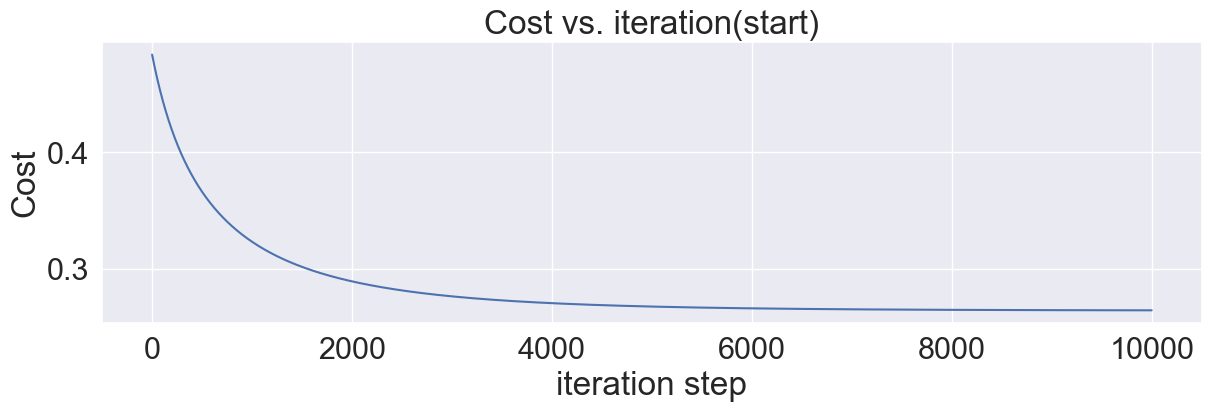

In [27]:
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, 1, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history4[:10000])
ax1.set_title("Cost vs. iteration(start)");
ax1.set_ylabel('Cost')            ;
ax1.set_xlabel('iteration step')  ;
plt.show()

In [27]:
print("Trial 1 Mean Squared Error(MSE) for train dataset:", cost_function_with_regularization(X_train, y_train, w_final4, b_final4, 10))
print("Trial 2 Squared Error(MSE) for test dataset:", cost_function_with_regularization(X_test, y_test, w_final4, b_final4, 10)) #Lamba is 10

Trial 1 Mean Squared Error(MSE) for train dataset: 0.26438628554678273
Trial 2 Squared Error(MSE) for test dataset: 0.504827040289454


In [23]:
w_or = w_final4
b_or = b_final4

In [25]:
print("Trial 2 Mean Squared Error(MSE) for test dataset:", cost_function_with_regularization(X_test, y_test, w_final4, b_final4, 1)) #Lambda is 1
print("Trial 3 Mean Squared Error(MSE) for test dataset:", cost_function_with_regularization(X_test, y_test, w_final4, b_final4, 100)) #Lambda is 100
print("Trial 4 Mean Squared Error(MSE) for test dataset:", cost_function_with_regularization(X_test, y_test, w_final4, b_final4, 1000)) #Lambda is 1000

Trial 2 Mean Squared Error(MSE) for test dataset: 0.3125810293829277
Trial 3 Mean Squared Error(MSE) for test dataset: 2.427287149354717
Trial 4 Mean Squared Error(MSE) for test dataset: 21.65188824000735


In [26]:
print("Trial 2 Mean Squared Error(MSE) for train dataset:", cost_function_with_regularization(X_train, y_train, w_final4, b_final4, 1)) #Lambda is 1
print("Trial 3 Mean Squared Error(MSE) for train dataset:", cost_function_with_regularization(X_train, y_train, w_final4, b_final4, 100)) #Lambda is 100
print("Trial 4 Mean Squared Error(MSE) for train dataset:", cost_function_with_regularization(X_train, y_train, w_final4, b_final4, 1000)) #Lambda is 1000

Trial 2 Mean Squared Error(MSE) for train dataset: 0.20016750068686517
Trial 3 Mean Squared Error(MSE) for train dataset: 0.906574134145958
Trial 4 Mean Squared Error(MSE) for train dataset: 7.328452620137712


In [29]:
def accuracy(X, y, w, b):
    count = 0
    m = X.shape[0] #number of instances 
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb = 1 / (1 + np.exp(-z))
        if (f_wb >= 0.5 and y[i] == 1) or (f_wb < 0.5 and y[i] == 0):
            count = count + 1
    
    acc = count/m
    
    return acc
        
    
train_accuracy = accuracy(X_train, y_train, w, b)
test_accuracy = accuracy(X_test, y_test, w, b)

print("Training accuracy: ", round(train_accuracy*100, 2))
print("Testing accuracy: ", round(test_accuracy*100, 2))


Training accuracy:  95.09
Testing accuracy:  82.43
